In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np

# RNN using nn.Linear

In [ ]:
class RNNLinear(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(RNNLinear, self).__init__()

        #define linear layer for i2h(wx), h2h(wh)
        #...
        self.i2h = nn.Linear(n_inputs, n_neurons)
        self.h2h = nn.Linear(n_neurons, n_neurons)


    def forward(self, X, h):
        #compute output of hidden (as y)
        #...
        h = torch.tanh(self.i2h(X) + self.h2h(h))
        return h


### RNN with A Single Neuron

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vQXBLYvvI1dqAHdLA0hQdsP1PojmCfuSCMK2DXEL0uTvRUqvD1eYK8fsECcNCoekxCbgWJ-k7QF_1s4/pub?w=600&h=400)

In [ ]:
X1 = torch.tensor([[0,1,2,0]],dtype = torch.float) #Sequence 1
X2 = torch.tensor([[9,8,7,0]],dtype = torch.float) #Sequence 2

#new object, call model for seq1 seq2
#...
n_inputs = 4
n_neurons = 1

model = RNNLinear(n_inputs=n_inputs,n_neurons=n_neurons)
h0 = torch.zeros(1,n_neurons)
h1 = model(X1, h0)
h2 = model(X2, h1)

print(h1,"\n",h2)

tensor([[0.7897]], grad_fn=<TanhBackward0>) 
 tensor([[0.9562]], grad_fn=<TanhBackward0>)


### RNN with 5 Neurons

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vQov6BGg1fXOb7Bg5zenPh7R5j6VsZJh_D6JevQ_sm_fCxmXORxad3qLIFGG1FojzJig0qdcAQoGYoN/pub?w=600&h=404)

In [ ]:
X1 = torch.tensor([[0,1,2,0]],dtype = torch.float) #Sequence 1
X2 = torch.tensor([[9,8,7,0]],dtype = torch.float) #Sequence 2

#new object, call model for seq1 seq2
#...
n_inputs = 4
n_neurons = 5

model = RNNLinear(n_inputs=n_inputs, n_neurons=n_neurons)
h0 = torch.zeros(4, n_neurons)
h1 = model(X1, h0)
h2 = model(X2, h1)

print(h1,"\n",h2)

tensor([[-0.6591, -0.5795,  0.7738, -0.8452, -0.8033],
        [-0.6591, -0.5795,  0.7738, -0.8452, -0.8033],
        [-0.6591, -0.5795,  0.7738, -0.8452, -0.8033],
        [-0.6591, -0.5795,  0.7738, -0.8452, -0.8033]],
       grad_fn=<TanhBackward0>) 
 tensor([[-0.5719,  0.6954,  0.9995, -0.9593, -0.9993],
        [-0.5719,  0.6954,  0.9995, -0.9593, -0.9993],
        [-0.5719,  0.6954,  0.9995, -0.9593, -0.9993],
        [-0.5719,  0.6954,  0.9995, -0.9593, -0.9993]],
       grad_fn=<TanhBackward0>)


#PyTorch Built-in RNN

In [ ]:
# Create the input tensor: 2 batches, 4 sequences, 3 dimensions
X = torch.tensor([[
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 0, 1]],
    [[9, 8, 7],
    [0, 0, 0],
    [6, 5, 4],
    [3, 2, 1]]], dtype=torch.float)  # Shape: (2, 4, 3)

##nn.RNN()

In [ ]:
rnn = nn.RNN(3, 5, batch_first=True) #3dim, 5nodes

# Pass the input through thhttps://colab.research.google.com/drive/1NQAwwe-VStW_F54OyFeJCbd6Zy18NjXo#scrollTo=nn_RNN_e RNN
output, h_n = rnn(X)  # output: (batch_size, sequence_length, hidden_size), h_n: (num_layers, batch_size, hidden_size)

print("Output shape:", output.shape)  # Should be (2, 4, 5)
print("Output:", output)

print("Final hidden states shape:", h_n.shape)  # Should be (num_layers, batch_size, hidden_size)
print("Final hidden states:", h_n)


print(output[:,-1,:])
print(h_n)

Output shape: torch.Size([2, 4, 5])
Output: tensor([[[-0.7710, -0.0099,  0.4094,  0.3517, -0.7783],
         [-0.8972,  0.1346,  0.7014, -0.2613, -0.9989],
         [-0.9652,  0.0236,  0.9024, -0.8467, -1.0000],
         [ 0.9952, -0.9550,  0.9927, -0.9814, -0.9981]],

        [[-0.6386, -0.0982,  0.9260, -0.9860, -1.0000],
         [-0.2444, -0.1441,  0.6940, -0.4465,  0.3411],
         [-0.3126, -0.4764,  0.8962, -0.9823, -1.0000],
         [-0.0016, -0.3232,  0.8236, -0.8926, -0.9615]]],
       grad_fn=<TransposeBackward1>)
Final hidden states shape: torch.Size([1, 2, 5])
Final hidden states: tensor([[[ 0.9952, -0.9550,  0.9927, -0.9814, -0.9981],
         [-0.0016, -0.3232,  0.8236, -0.8926, -0.9615]]],
       grad_fn=<StackBackward0>)
tensor([[ 0.9952, -0.9550,  0.9927, -0.9814, -0.9981],
        [-0.0016, -0.3232,  0.8236, -0.8926, -0.9615]],
       grad_fn=<SliceBackward0>)
tensor([[[ 0.9952, -0.9550,  0.9927, -0.9814, -0.9981],
         [-0.0016, -0.3232,  0.8236, -0.8926, -0.9

#Example

##Data

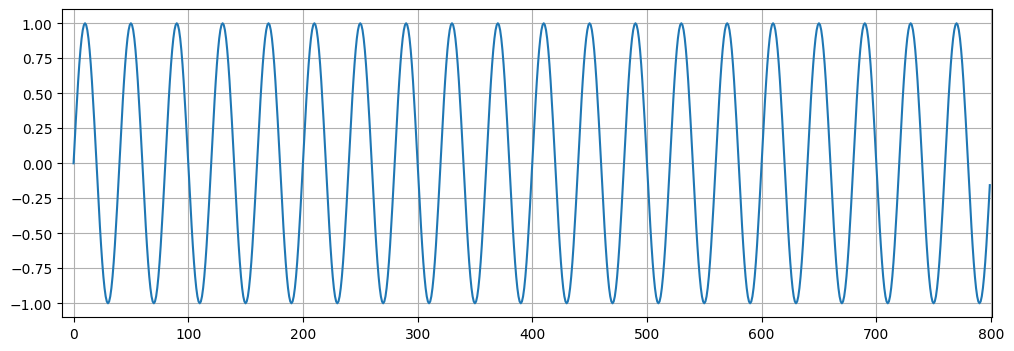

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create & plot data points
x = torch.linspace(0,799,steps=800)
y = torch.sin(x*2*3.1416/40)

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy());

In [ ]:
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out


test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

window_size = 40 #sequence
# Create the training dataset of sequence/label tuples:
train_data = input_data(train_set,window_size)

train_data[:3]

[(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
           7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
           1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
           7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
          -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
          -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
          -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
          -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
  tensor([1.4480e-05])),
 (tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
           8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
           9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
           5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
          -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01

##RNN

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):

      super().__init__()
      #...
      self.hidden_size = hidden_size
      self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
      self.linear = nn.Linear(hidden_size, out_size)

    def forward(self,seq):
      hidden  = torch.zeros(1,1,self.hidden_size)
      rnn_out, hidden = self.rnn(seq.view(1,len(seq),-1),hidden)
      pred = self.linear(rnn_out.view(len(seq), -1))
      return pred[-1]


        #...



Epoch:  1 Loss: 0.00268490
Loss on test predictions: 0.4725569784641266


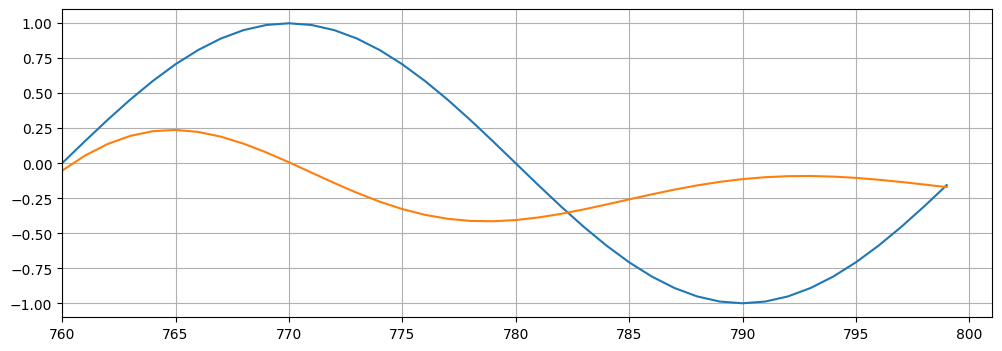

Epoch:  2 Loss: 0.00000080
Loss on test predictions: 0.007649493403732777


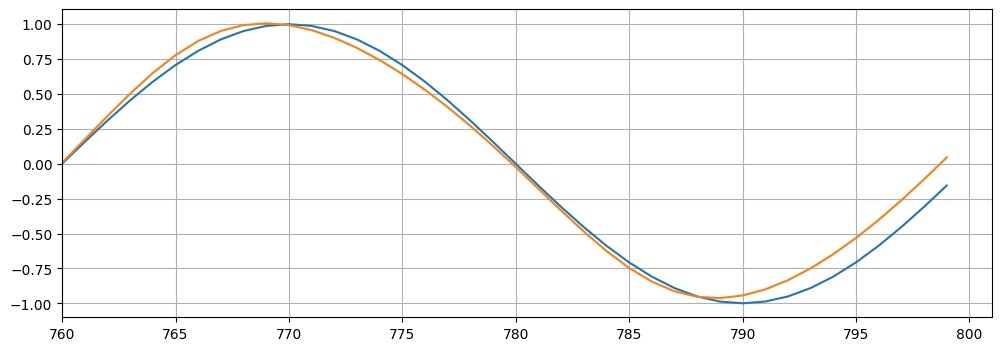

Epoch:  3 Loss: 0.00000100
Loss on test predictions: 0.00707341218367219


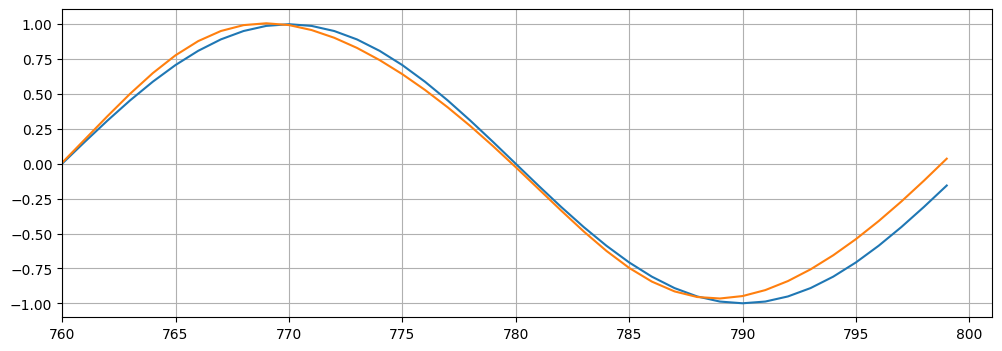

Epoch:  4 Loss: 0.00000117
Loss on test predictions: 0.006673366762697697


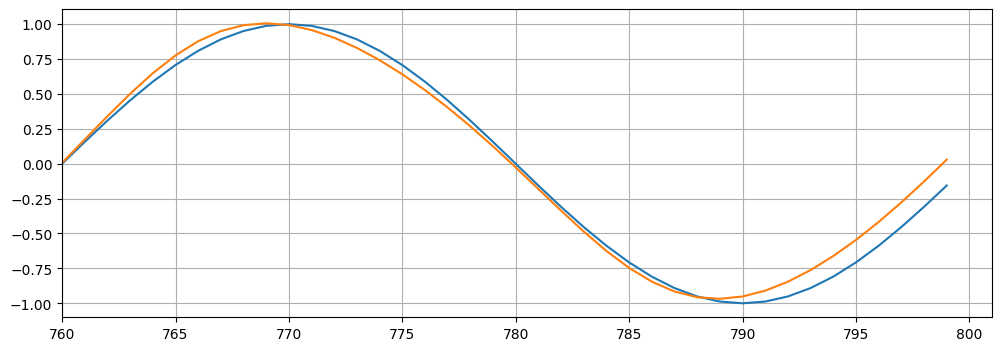

Epoch:  5 Loss: 0.00000134
Loss on test predictions: 0.006334411911666393


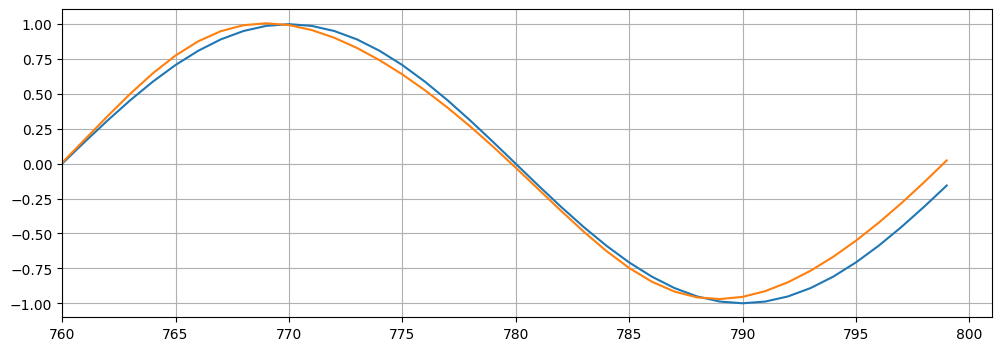

Epoch:  6 Loss: 0.00000151
Loss on test predictions: 0.006043007597327232


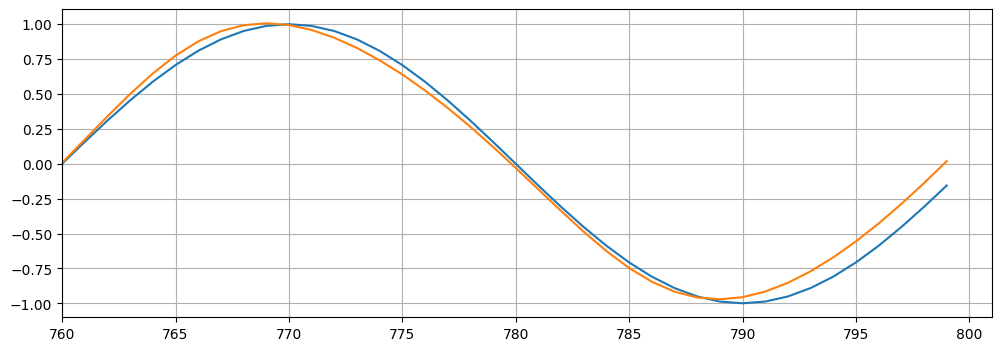

Epoch:  7 Loss: 0.00000167
Loss on test predictions: 0.005788921378552914


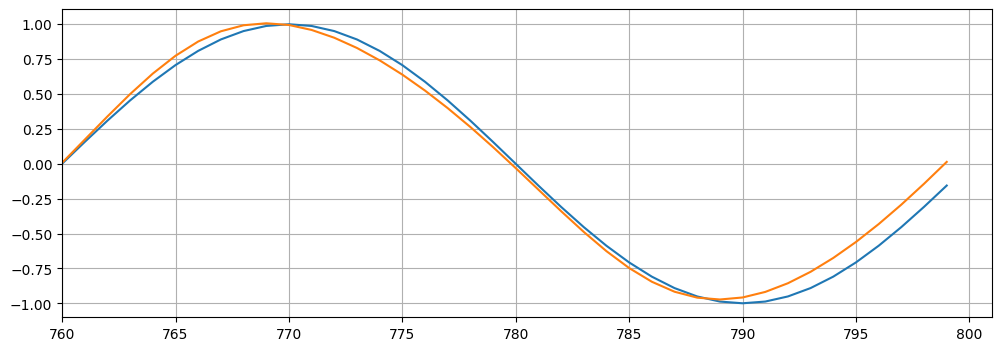

Epoch:  8 Loss: 0.00000181
Loss on test predictions: 0.005564642138779163


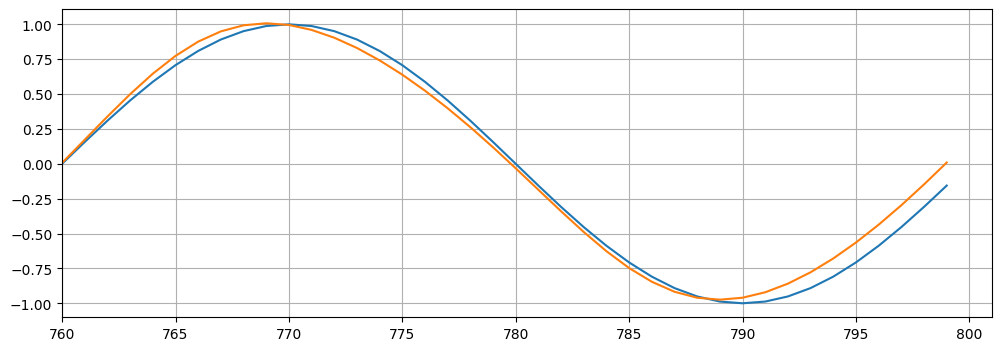

Epoch:  9 Loss: 0.00000194
Loss on test predictions: 0.005364407319575548


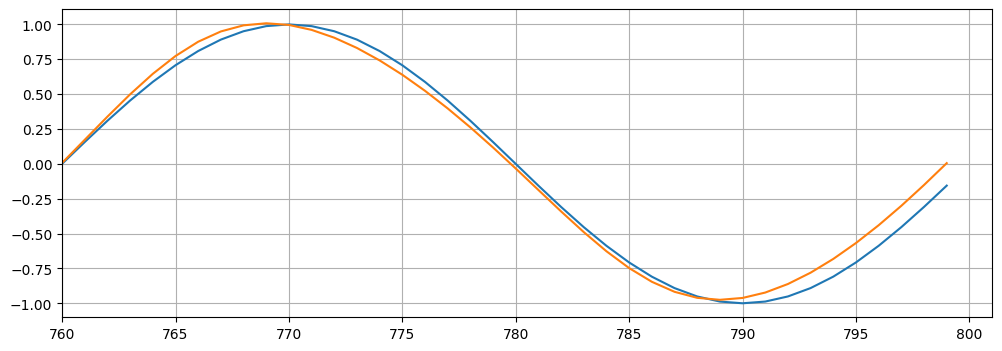

Epoch: 10 Loss: 0.00000206
Loss on test predictions: 0.005183132831007242


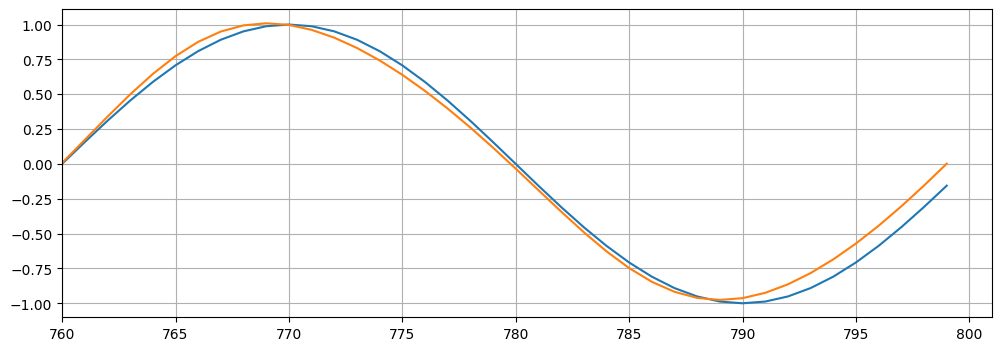

In [ ]:
model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10
future = 40

for i in range(epochs):

    # tuple-unpack the train_data set
    for x_train, y_train in train_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        y_pred = model(x_train)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')

    # MAKE PREDICTIONS
    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(760,801)
    plt.grid(True)
    plt.plot(range(760,800), y.numpy()[-window_size:])
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

##LSTM

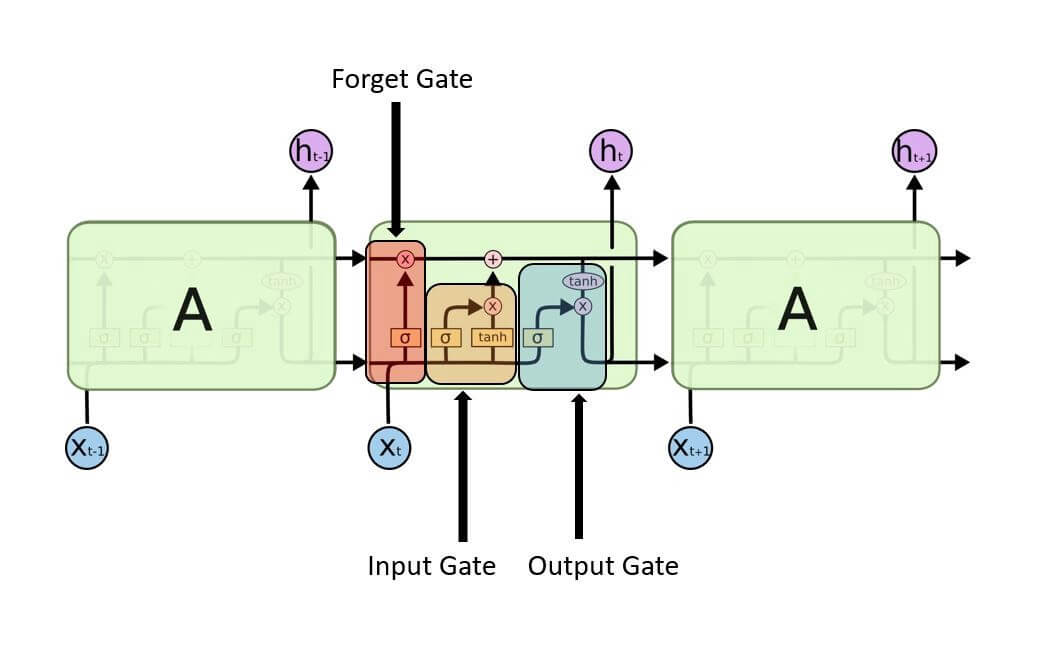

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        #...
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, out_size)

    def forward(self,seq):
        #...
        hidden_c  =(torch.zeros(1,1,self.hidden_size),
                          torch.zeros(1,1,self.hidden_size))


        lstm_out, hidden_c = self.lstm(seq.view(1,len(seq),-1),hidden_c)
        pred = self.linear(lstm_out.view(len(seq), -1))
        return pred[-1]

Epoch:  1 Loss: 0.07656445
Loss on test predictions: 0.58249831199646


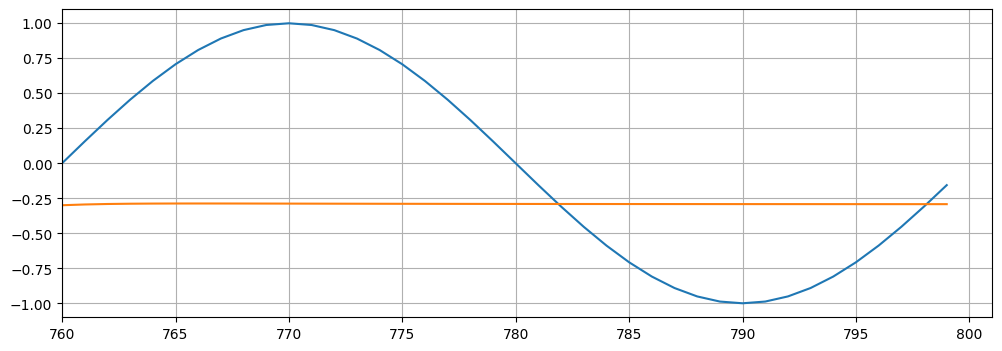

Epoch:  2 Loss: 0.04492767
Loss on test predictions: 0.5232506990432739


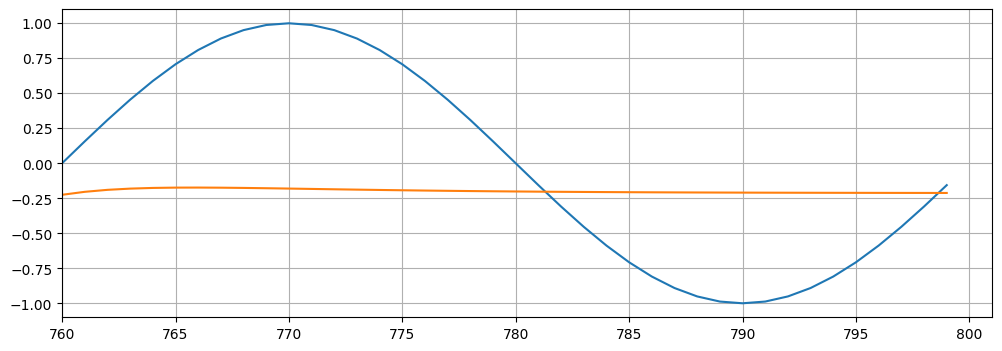

Epoch:  3 Loss: 0.01461942
Loss on test predictions: 0.3931702673435211


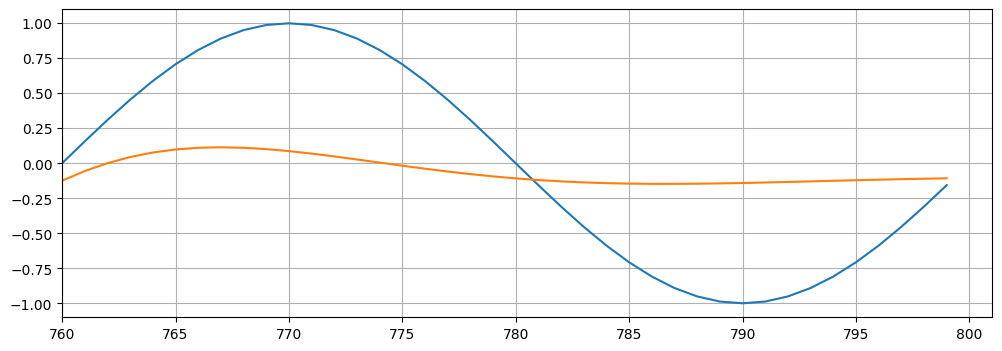

Epoch:  4 Loss: 0.00132715
Loss on test predictions: 0.099835604429245


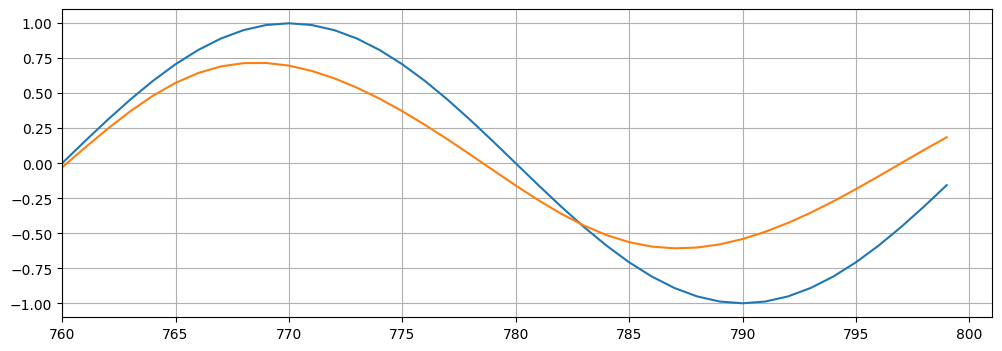

Epoch:  5 Loss: 0.00014880
Loss on test predictions: 0.006640590727329254


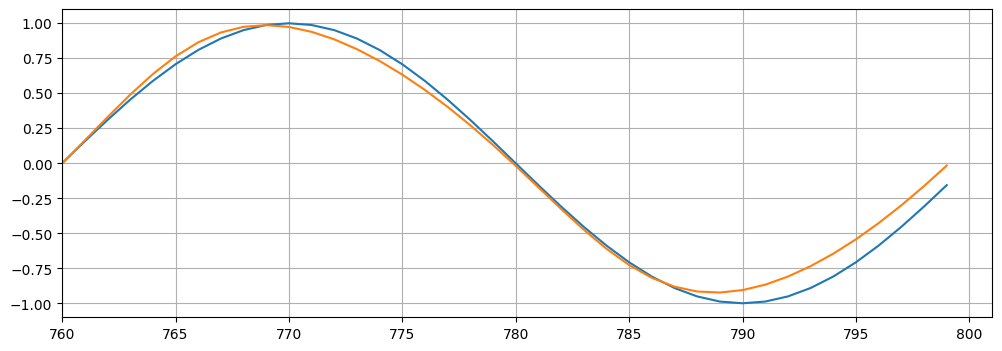

Epoch:  6 Loss: 0.00007956
Loss on test predictions: 0.0027859851252287626


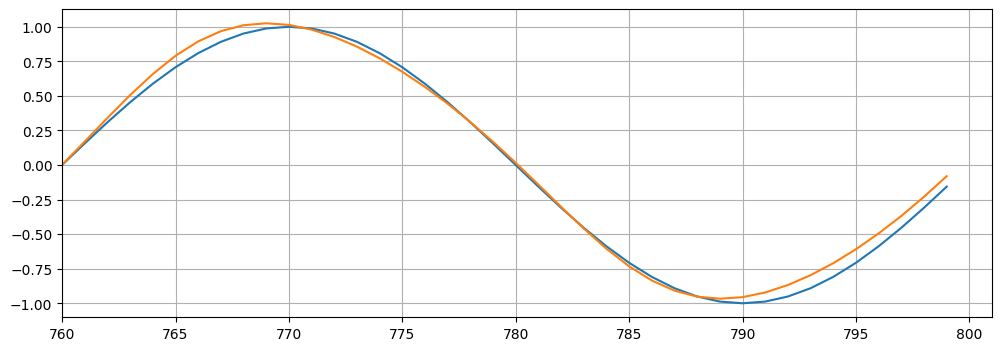

Epoch:  7 Loss: 0.00007098
Loss on test predictions: 0.002533671911805868


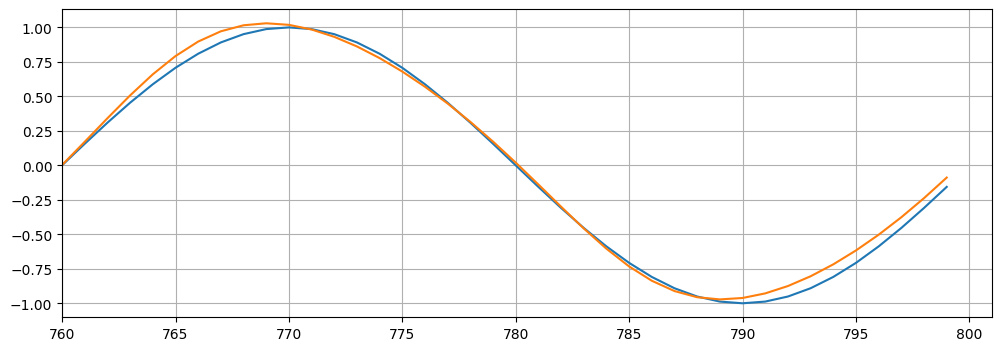

Epoch:  8 Loss: 0.00006782
Loss on test predictions: 0.00247559929266572


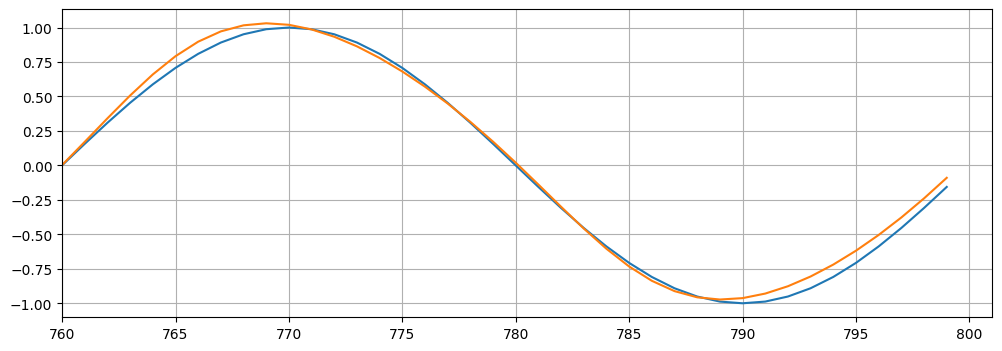

Epoch:  9 Loss: 0.00006531
Loss on test predictions: 0.002434688853099942


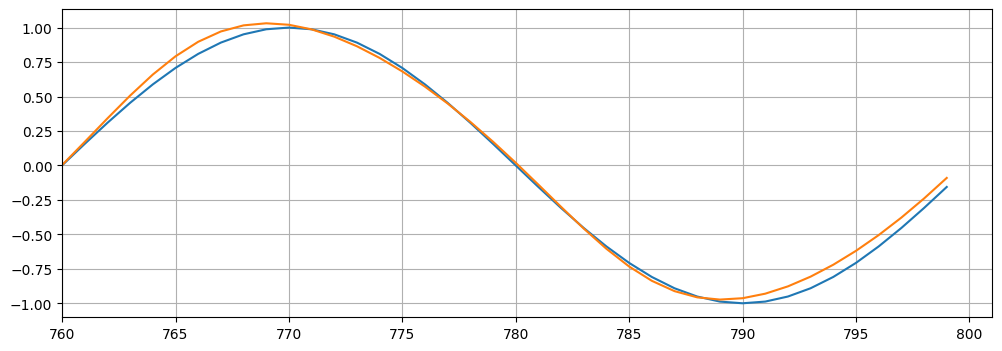

Epoch: 10 Loss: 0.00006295
Loss on test predictions: 0.002395347226411104


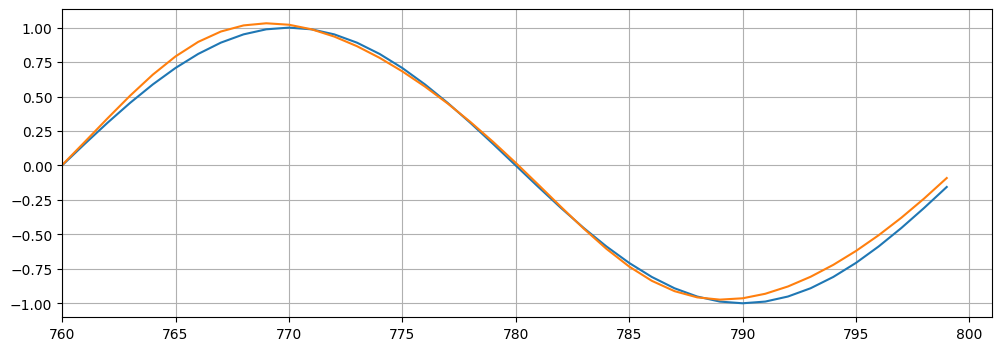

In [ ]:
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10
future = 40

for i in range(epochs):

    # tuple-unpack the train_data set
    for x_train, y_train in train_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        y_pred = model(x_train)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')

    # MAKE PREDICTIONS
    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(760,801)
    plt.grid(True)
    plt.plot(range(760,800), y.numpy()[-window_size:])
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

#[Workshop] Stock price prediction: RNN vs LSTM

In [ ]:
!gdown 1Ytf1couC1vtsPjvGNyo1XycGPM286Plh

Downloading...
From: https://drive.google.com/uc?id=1Ytf1couC1vtsPjvGNyo1XycGPM286Plh
To: /content/AOT.csv
100% 110k/110k [00:00<00:00, 76.4MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('AOT.csv', index_col='Date', parse_dates=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-04,63.25,64.50,63.00,64.00,47.714363,14341900
2017-01-05,64.25,64.75,63.75,64.25,47.900749,12762900
2017-01-06,64.50,64.50,63.75,64.00,47.714363,8106700
2017-01-09,64.00,64.00,63.00,63.25,47.155212,10983300
2017-01-10,63.00,63.50,62.75,63.50,47.341595,8163200
...,...,...,...,...,...,...
2024-09-02,25.00,25.00,25.00,25.00,25.000000,0
2024-09-03,25.00,25.00,25.00,25.00,25.000000,0
2024-09-04,25.00,25.00,25.00,25.00,25.000000,0


In [ ]:
X = torch.tensor(data.drop('Close', axis=1).values.astype(np.float32))
y = torch.tensor(data.Close.values.astype(np.float32))

In [ ]:
data.drop('Close', axis=1)

,Open,High,Low,Adj Close,Volume
Date,,,,,
2017-01-04,63.25,64.50,63.00,47.714363,14341900
2017-01-05,64.25,64.75,63.75,47.900749,12762900
2017-01-06,64.50,64.50,63.75,47.714363,8106700
2017-01-09,64.00,64.00,63.00,47.155212,10983300
2017-01-10,63.00,63.50,62.75,47.341595,8163200
...,...,...,...,...,...
2024-09-02,25.00,25.00,25.00,25.000000,0
2024-09-03,25.00,25.00,25.00,25.000000,0
2024-09-04,25.00,25.00,25.00,25.000000,0


In [ ]:
X.shape

torch.Size([1865, 5])

In [ ]:
X

tensor([[6.3250e+01, 6.4500e+01, 6.3000e+01, 4.7714e+01, 1.4342e+07],
        [6.4250e+01, 6.4750e+01, 6.3750e+01, 4.7901e+01, 1.2763e+07],
        [6.4500e+01, 6.4500e+01, 6.3750e+01, 4.7714e+01, 8.1067e+06],
        ...,
        [2.5000e+01, 2.5000e+01, 2.5000e+01, 2.5000e+01, 0.0000e+00],
        [2.6500e+01, 2.7500e+01, 2.6250e+01, 2.7250e+01, 3.2859e+07],
        [2.7500e+01, 2.8250e+01, 2.7250e+01, 2.8000e+01, 1.8420e+07]])

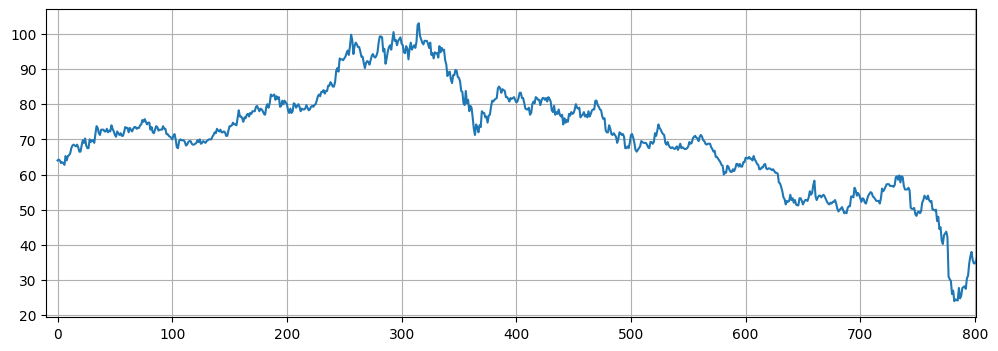

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy());

In [ ]:
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out


test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

window_size = 40 #sequence
# Create the training dataset of sequence/label tuples:
train_data = input_data(train_set,window_size)

train_data[:3]

[(tensor([64.0000, 64.2500, 64.0000, 63.2500, 63.5000, 63.2500, 62.7500, 65.2500,
          64.0000, 65.2500, 65.5000, 66.0000, 67.5000, 68.2500, 68.5000, 68.2500,
          68.0000, 68.5000, 67.7500, 66.5000, 66.5000, 68.2500, 69.7500, 69.0000,
          70.2500, 68.2500, 67.5000, 67.5000, 70.0000, 69.2500, 69.7500, 69.7500,
          69.0000, 71.5000, 73.7500, 73.2500, 71.7500, 71.2500, 72.7500, 72.7500]),
  tensor([72.7500])),
 (tensor([64.2500, 64.0000, 63.2500, 63.5000, 63.2500, 62.7500, 65.2500, 64.0000,
          65.2500, 65.5000, 66.0000, 67.5000, 68.2500, 68.5000, 68.2500, 68.0000,
          68.5000, 67.7500, 66.5000, 66.5000, 68.2500, 69.7500, 69.0000, 70.2500,
          68.2500, 67.5000, 67.5000, 70.0000, 69.2500, 69.7500, 69.7500, 69.0000,
          71.5000, 73.7500, 73.2500, 71.7500, 71.2500, 72.7500, 72.7500, 72.7500]),
  tensor([72.2500])),
 (tensor([64.0000, 63.2500, 63.5000, 63.2500, 62.7500, 65.2500, 64.0000, 65.2500,
          65.5000, 66.0000, 67.5000, 68.2500, 68.5

## Your work 653380120-2 กัมแพงเพชร สิงห์ขรณ์

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):

      super().__init__()
      #...
      self.hidden_size = hidden_size
      self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
      self.linear = nn.Linear(hidden_size, out_size)

    def forward(self,seq):
      hidden  = torch.zeros(1,1,self.hidden_size)
      rnn_out, hidden = self.rnn(seq.view(1,len(seq),-1),hidden)
      pred = self.linear(rnn_out.view(len(seq), -1))
      return pred[-1]

Epoch:  1 Loss: 0.00009818
Loss on test predictions: 31.785701751708984


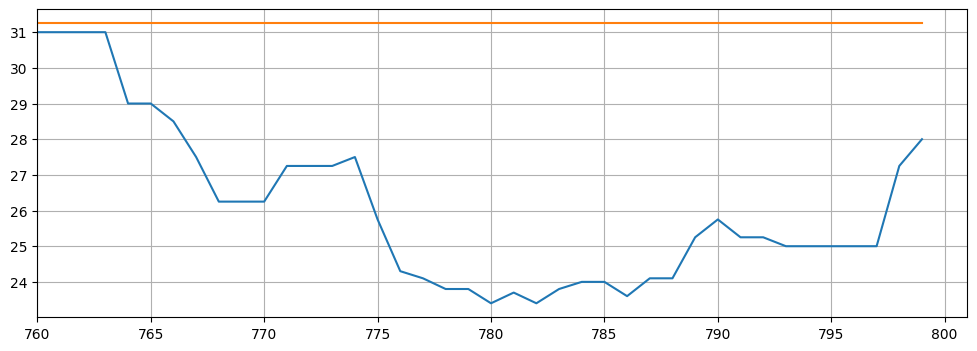

Epoch:  2 Loss: 0.00009777
Loss on test predictions: 31.785701751708984


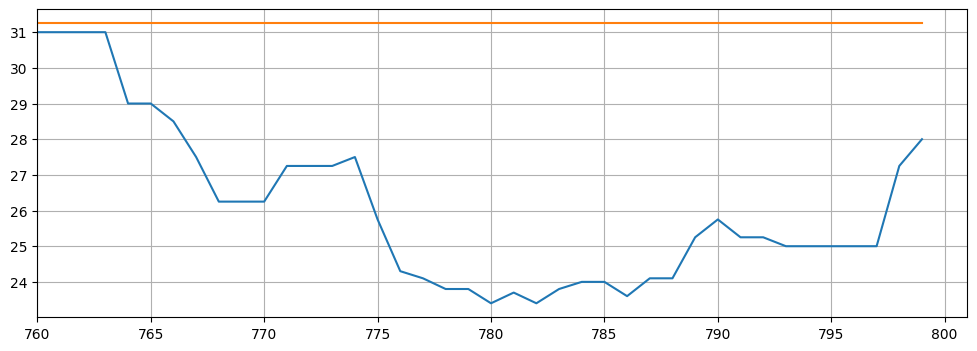

Epoch:  3 Loss: 0.00009743
Loss on test predictions: 31.785724639892578


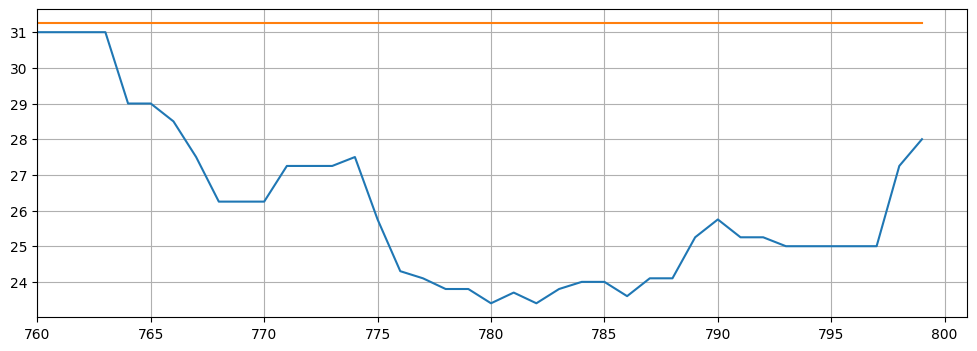

Epoch:  4 Loss: 0.00009728
Loss on test predictions: 31.785680770874023


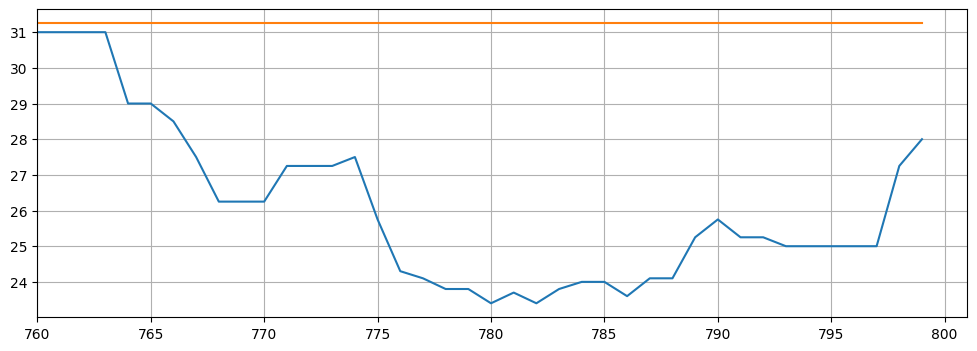

Epoch:  5 Loss: 0.00009709
Loss on test predictions: 31.78574562072754


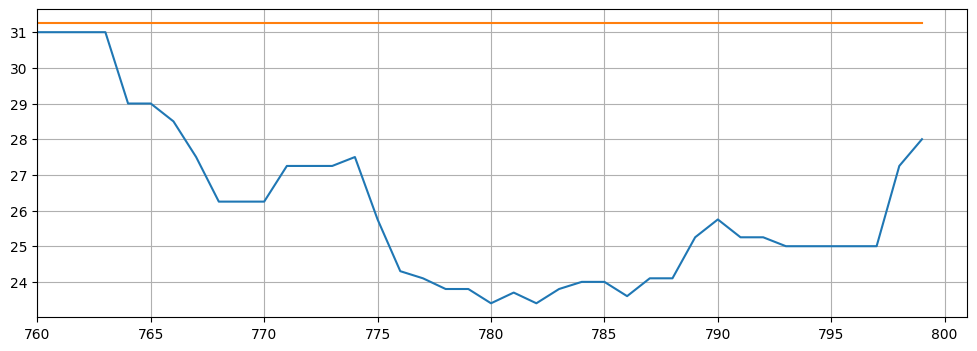

Epoch:  6 Loss: 0.00009698
Loss on test predictions: 31.78574562072754


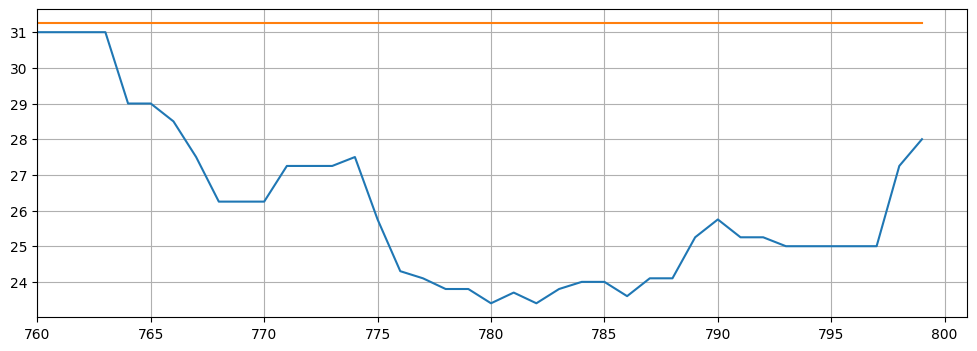

Epoch:  7 Loss: 0.00009690
Loss on test predictions: 31.785680770874023


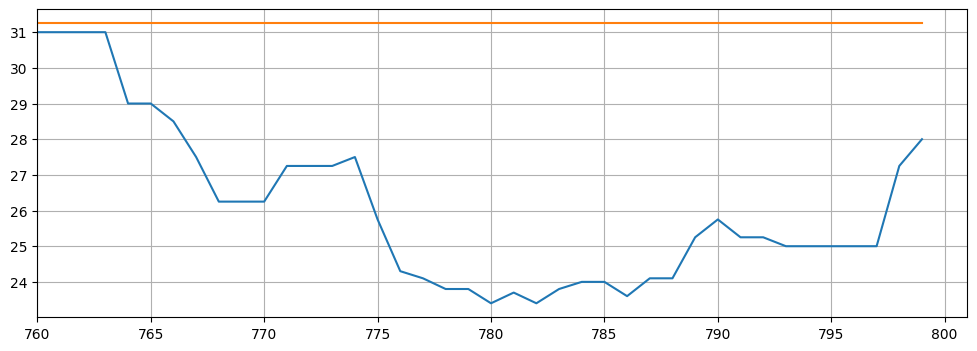

Epoch:  8 Loss: 0.00009690
Loss on test predictions: 31.785701751708984


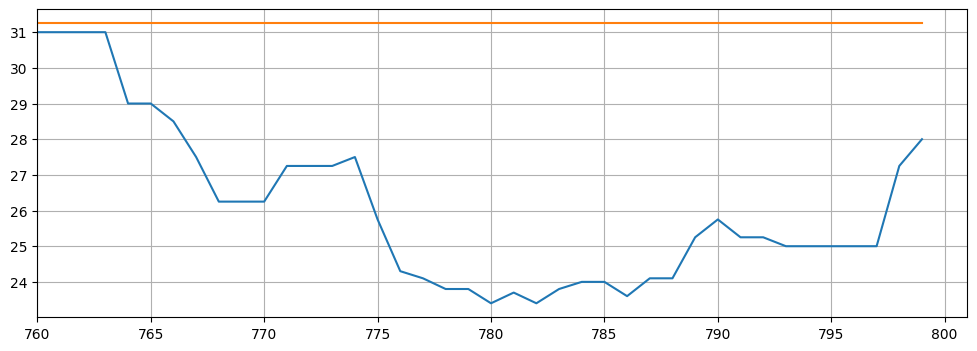

Epoch:  9 Loss: 0.00009686
Loss on test predictions: 31.78574562072754


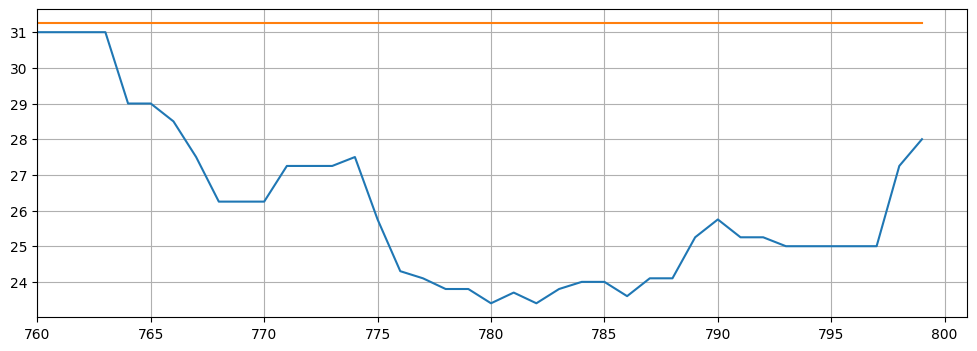

Epoch: 10 Loss: 0.00009671
Loss on test predictions: 31.785724639892578


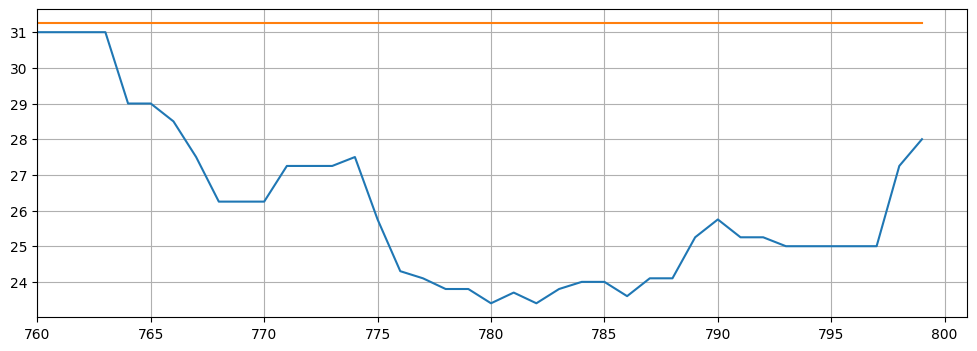

In [ ]:
model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10
future = 40

for i in range(epochs):

    # tuple-unpack the train_data set
    for x_train, y_train in train_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        y_pred = model(x_train)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')

    # MAKE PREDICTIONS
    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]),y[1825:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(760,801)
    plt.grid(True)
    plt.plot(range(760,800), y.numpy()[-window_size:])
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        #...
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, out_size)

    def forward(self,seq):
        #...
        hidden_c  =(torch.zeros(1,1,self.hidden_size),
                          torch.zeros(1,1,self.hidden_size))


        lstm_out, hidden_c = self.lstm(seq.view(1,len(seq),-1),hidden_c)
        pred = self.linear(lstm_out.view(len(seq), -1))
        return pred[-1]

Epoch:  1 Loss: 0.24886832
Loss on test predictions: 28.5714168548584


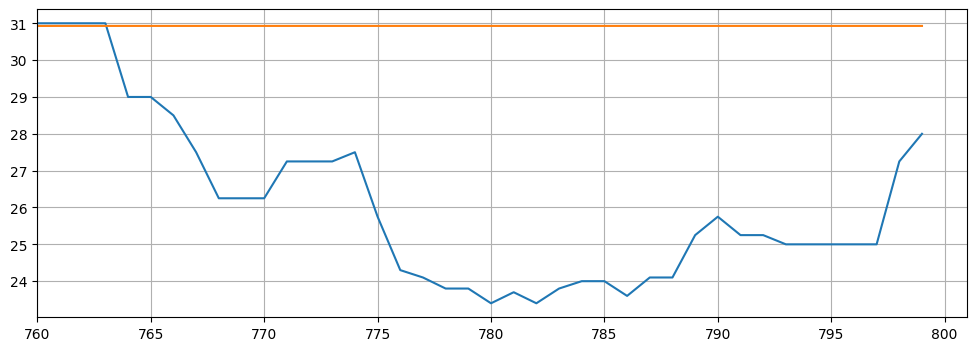

Epoch:  2 Loss: 0.19774643
Loss on test predictions: 29.121912002563477


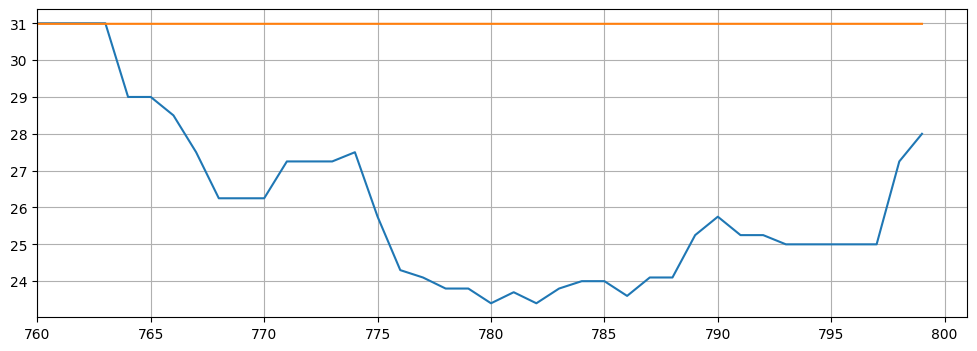

Epoch:  3 Loss: 0.20684619
Loss on test predictions: 29.023305892944336


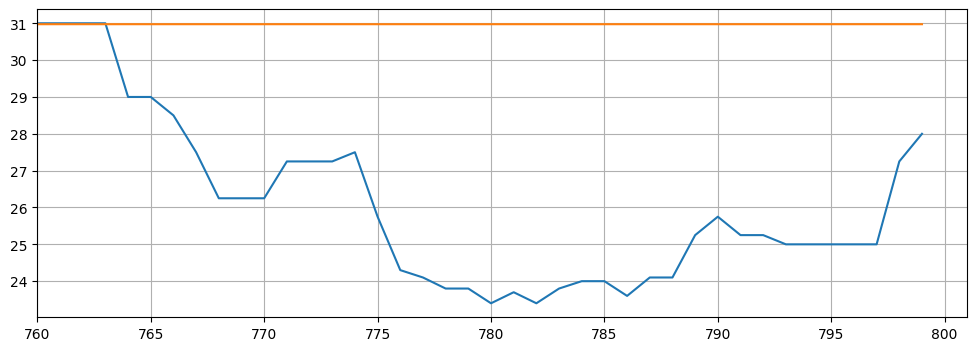

Epoch:  4 Loss: 0.23843534
Loss on test predictions: 28.621490478515625


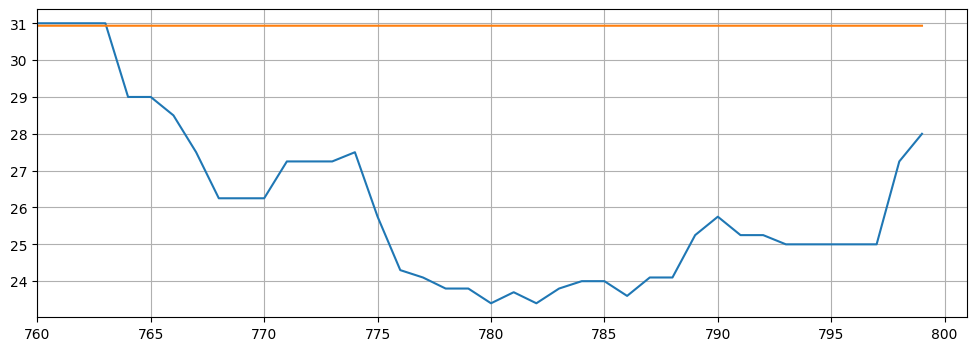

Epoch:  5 Loss: 0.23943667
Loss on test predictions: 28.61578941345215


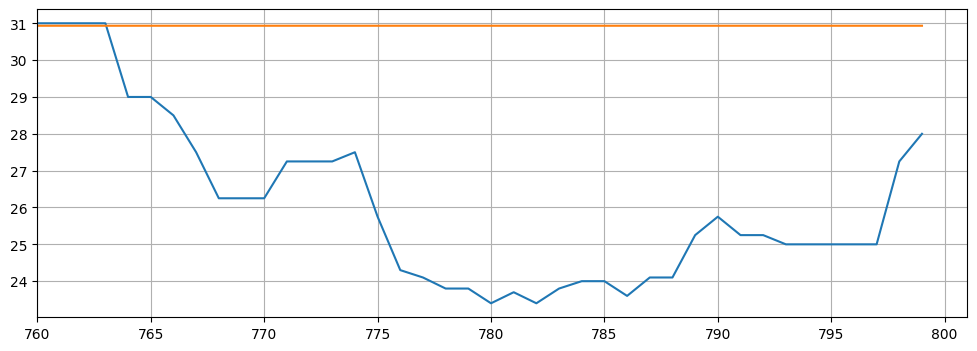

Epoch:  6 Loss: 0.23935641
Loss on test predictions: 28.615734100341797


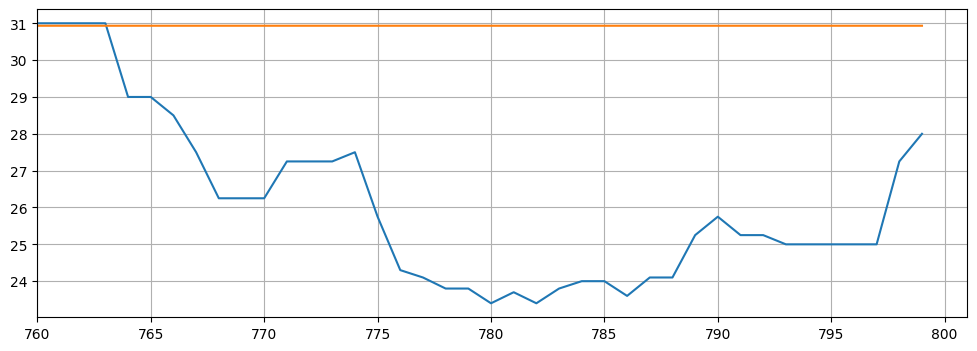

Epoch:  7 Loss: 0.24746397
Loss on test predictions: 28.508800506591797


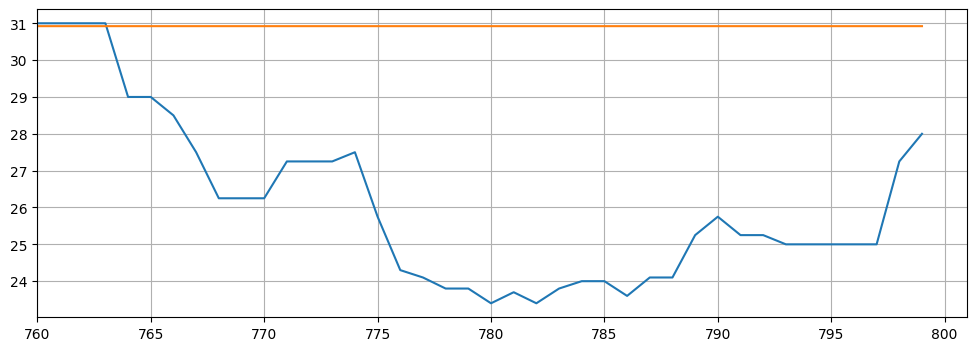

Epoch:  8 Loss: 0.27427843
Loss on test predictions: 28.140588760375977


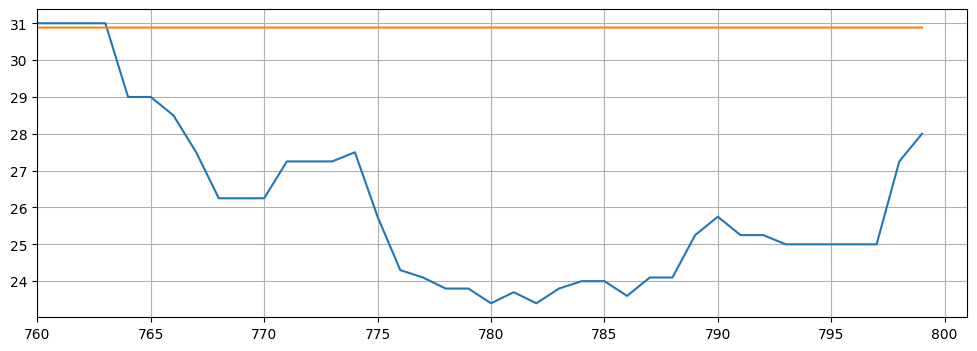

Epoch:  9 Loss: 0.27490410
Loss on test predictions: 28.13547134399414


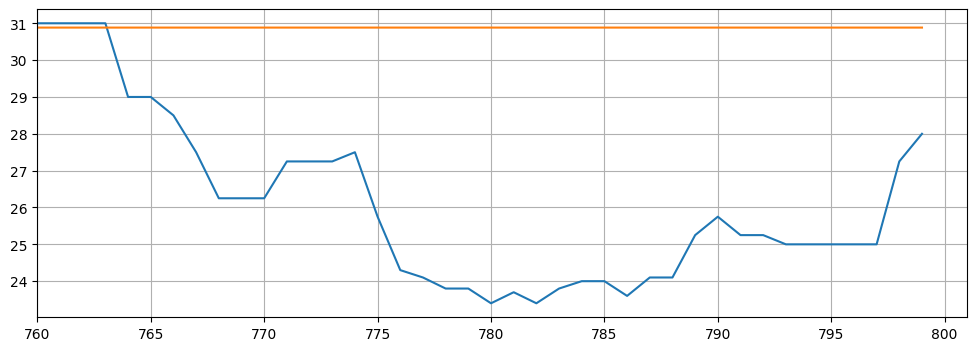

Epoch: 10 Loss: 0.26622331
Loss on test predictions: 28.250873565673828


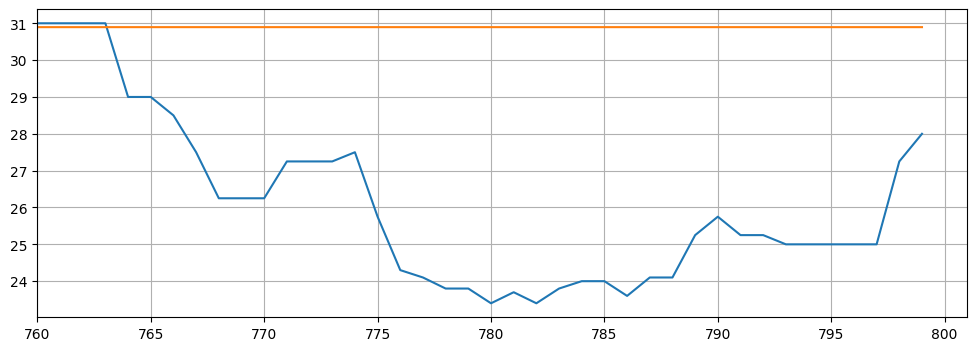

In [ ]:
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10
future = 40

for i in range(epochs):

    # tuple-unpack the train_data set
    for x_train, y_train in train_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        y_pred = model(x_train)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')

    # MAKE PREDICTIONS
    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]),y[-window_size:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(760,801)
    plt.grid(True)
    plt.plot(range(760,800), y.numpy()[-window_size:])
    plt.plot(range(760,800),preds[window_size:])
    plt.show()